**import important libereries**

In [24]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

**setup data**

In [25]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

**lets visulize it**

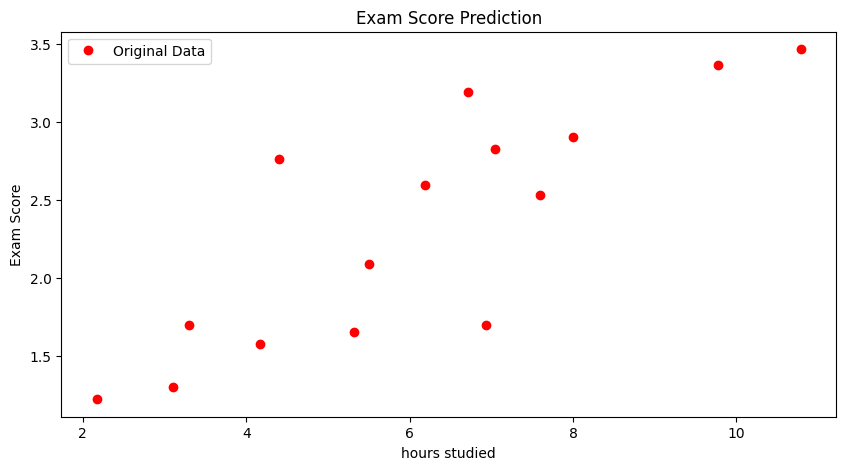

In [26]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train,y_train,'ro',label='Original Data')
plt.xlabel('hours studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

**converting numpy arrays to pytorch tensors**

In [27]:
x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)
x_train,y_train

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]]),
 tensor([[1.7000],
         [2.7600],
         [2.0900],
         [3.1900],
         [1.6940],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]]))

**Linear Regression Model**

In [28]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(1,1)

  def forward(self,x):
    out=self.linear(x)
    return out


In [29]:
model=LinearRegression()

In [30]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [31]:
list(model.parameters())

[Parameter containing:
 tensor([[0.4823]], requires_grad=True),
 Parameter containing:
 tensor([0.4829], requires_grad=True)]

**loss function and optimizer**

In [32]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-4)

***Training Loop***

In [33]:
num_epochs=1000

In [34]:
for epoch in range(num_epochs):
  model.train()
  out=model(x_train)
  loss=criterion(out,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch +1) % 20 == 0:
    print(f'Epoch: [{epoch +1 } / num_epochs], Loss: {loss.item():.6f}')

Epoch: [20 / num_epochs], Loss: 1.213843
Epoch: [40 / num_epochs], Loss: 0.910646
Epoch: [60 / num_epochs], Loss: 0.696359
Epoch: [80 / num_epochs], Loss: 0.544910
Epoch: [100 / num_epochs], Loss: 0.437871
Epoch: [120 / num_epochs], Loss: 0.362218
Epoch: [140 / num_epochs], Loss: 0.308748
Epoch: [160 / num_epochs], Loss: 0.270954
Epoch: [180 / num_epochs], Loss: 0.244241
Epoch: [200 / num_epochs], Loss: 0.225358
Epoch: [220 / num_epochs], Loss: 0.212009
Epoch: [240 / num_epochs], Loss: 0.202572
Epoch: [260 / num_epochs], Loss: 0.195898
Epoch: [280 / num_epochs], Loss: 0.191179
Epoch: [300 / num_epochs], Loss: 0.187840
Epoch: [320 / num_epochs], Loss: 0.185477
Epoch: [340 / num_epochs], Loss: 0.183804
Epoch: [360 / num_epochs], Loss: 0.182618
Epoch: [380 / num_epochs], Loss: 0.181777
Epoch: [400 / num_epochs], Loss: 0.181179
Epoch: [420 / num_epochs], Loss: 0.180753
Epoch: [440 / num_epochs], Loss: 0.180449
Epoch: [460 / num_epochs], Loss: 0.180231
Epoch: [480 / num_epochs], Loss: 0.180

**Evaluate Your Model**

In [35]:
model.eval()
with torch.no_grad():
  predict=model(x_train)
predict.data.numpy()

array([[1.4567918],
       [1.7876031],
       [2.1184146],
       [2.4823072],
       [2.5484695],
       [1.7178321],
       [3.4052713],
       [2.3235178],
       [2.7469563],
       [1.116056 ],
       [2.5821521],
       [3.7096179],
       [2.0621767],
       [2.8693566],
       [1.3966442]], dtype=float32)

**Visulizeing the model**

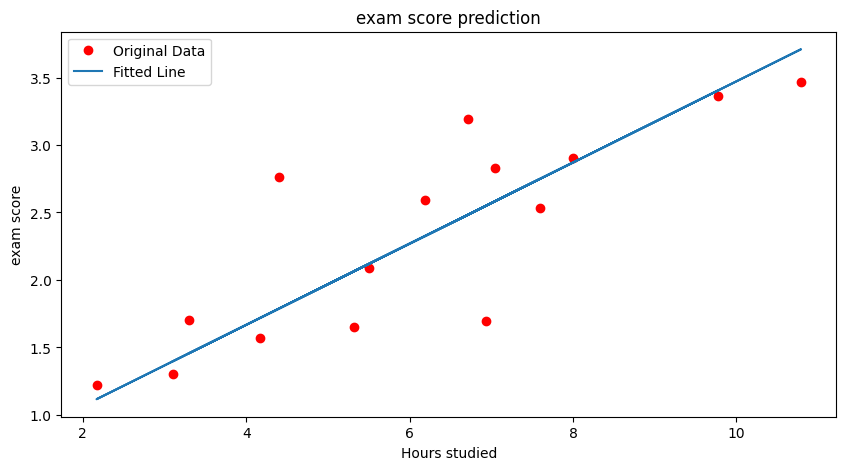

In [36]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original Data')
plt.plot(x_train.numpy(),predict,label='Fitted Line')
plt.xlabel('Hours studied')
plt.ylabel('exam score')
plt.legend()
plt.title('exam score prediction')
plt.show()


In [37]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3007]], requires_grad=True),
 Parameter containing:
 tensor([0.4644], requires_grad=True)]

**test model with new data point**

In [38]:
new_hours_studied=8.0
new_hours_tensor=torch.tensor([[new_hours_studied]],dtype=torch.float32)

In [39]:
model.eval()
with torch.no_grad():
 new_exam_score=model(new_hours_tensor)
print('predicted sxam score for a student who studied for 8 hours ', new_exam_score.item())

predicted sxam score for a student who studied for 8 hours  2.8702588081359863


Visulizing new data point

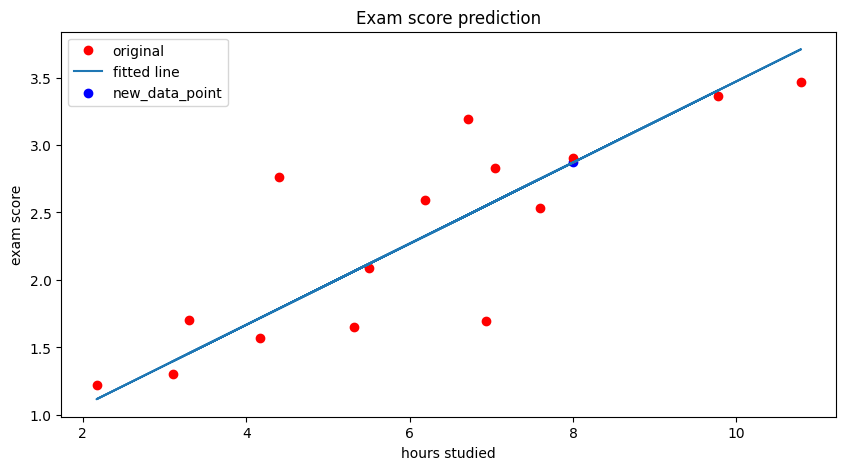

In [40]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='original')
plt.plot(x_train.numpy(),predict,label='fitted line')
plt.scatter([new_hours_studied],[new_exam_score.item()],color='blue',label='new_data_point')
plt.xlabel('hours studied')
plt.ylabel('exam score')
plt.legend()
plt.title('Exam score prediction')
plt.show()

**Save the model**

In [41]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.3007]])),
             ('linear.bias', tensor([0.4644]))])

In [42]:
torch.save(model.state_dict(),'./linearregression.pth')